In [34]:
import xarray as xr
import numpy as np
import os
import matplotlib.pyplot as plt

In [19]:
# Load dataset
file1 = xr.open_dataset('~/Parameters/Qsg_maxhs.nc')
file2 = xr.open_dataset('~/Parameters/Qsg_minhs.nc')

Qsg = file1.Qsg.data
alp11_1 = file1.alpha11.data
alp11_1[alp11_1<0] = 0
alp22_1 = file1.alpha22.data
Qe1 = file1.Qe.data
Qsm1 = file1.Qsm.data
Tsr1 = file1.Ts.data / file1.Ts_in.data
Tsre1 = file1.Ts_e.data / file1.Ts_in.data

alp11_2 = file2.alpha11.data
alp11_2[alp11_2<0] = 0
alp22_2 = file2.alpha22.data
Qe2 = file2.Qe.data
Qsm2 = file2.Qsm.data
Tsr2 = file2.Ts.data / file2.Ts_in.data
Tsre2 = file2.Ts_e.data / file2.Ts_in.data

In [7]:
# Print output
Tsr1, Tsre1, Qsg

(array([0.98557079, 0.98648079, 0.9875421 , 0.99274798, 0.99333863,
        0.99175767]),
 array([0.7480318 , 0.92849583, 0.93351454, 0.98712014, 0.98582932,
        0.98627963]),
 array([  25,   50,  100,  250,  500, 1000], dtype=int32))

Text(0.0, 1.0, '(d)')

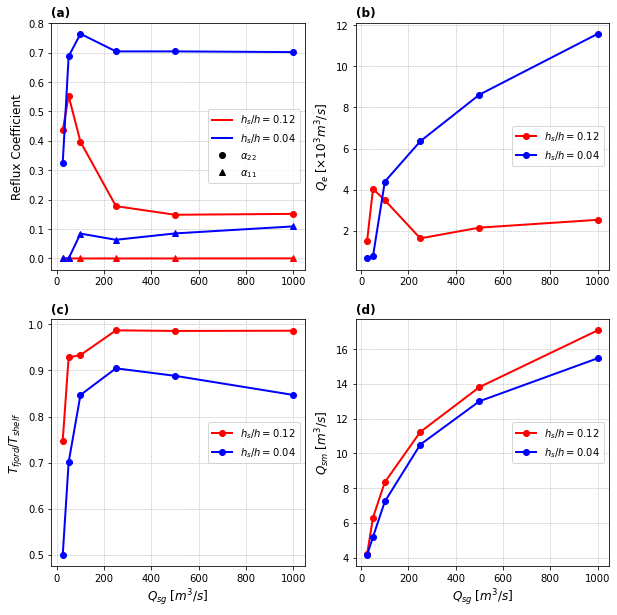

In [32]:
fig1 = plt.figure(figsize=(10,10))
#fig1.tight_layout()
#plt.grid(linestyle='--', linewidth=0.5)    
ax1 = fig1.add_subplot(221)
ax2 = fig1.add_subplot(222)
ax3 = fig1.add_subplot(223)
ax4 = fig1.add_subplot(224)

# Reflux coeff plot
ax1.plot(Qsg,alp11_1,'^-r', Qsg,alp22_1,'o-r', ms=6,lw=2)
ax1.plot(Qsg,alp11_2,'^-b', Qsg,alp22_2,'o-b', ms=6,lw=2)

line1 = plt.Line2D((0,1),(0,0), color='r', lw=2, linestyle='-')
line2 = plt.Line2D((0,1),(0,0), color='b', lw=2, linestyle='-')
marker1 = plt.Line2D((0,1),(0,0), color='k', marker='o', linestyle='')
marker2 = plt.Line2D((0,1),(0,0), color='k', marker='^', linestyle='') 
ax1.legend([line1,line2,marker1,marker2],[r'$h_s/h=0.12$',r'$h_s/h=0.04$',r'$\alpha_{22}$', r'$\alpha_{11}$'],
              loc='best', fontsize=10)

ax1.grid(linestyle='--', linewidth=0.5)
ax1.set_ylabel(r'Reflux Coefficient',size = 12)
#ax1.xaxis.set_visible(False)
ax1.set_title(r'(a)', loc='left', size=12, weight='bold')


# Qe plot
ax2.plot(Qsg,Qe1/1000,'o-r', Qsg,Qe2/1000,'o-b',ms=6, lw=2)
ax2.legend([r'$h_s/h=0.12$',r'$h_s/h=0.04$'],loc='right', fontsize=10)
ax2.set_ylabel(r'$Q_e\;[\times 10^3m^3/s]$',size = 12)
ax2.grid(linestyle='--', linewidth=0.5)
ax2.set_title(r'(b)', loc='left', size=12, weight='bold')


# T_fjord/T_shelf plot
ax3.plot(Qsg,Tsre1,'o-r', Qsg,Tsre2,'o-b',ms=6, lw=2)
ax3.legend([r'$h_s/h=0.12$',r'$h_s/h=0.04$'],loc='right', fontsize=10)
ax3.set_xlabel(r'$Q_{sg}\;[m^3/s]$',size = 12)
ax3.set_ylabel(r'$T_{fjord}/T_{shelf}$',size = 12)
ax3.grid(linestyle='--', linewidth=0.5)
ax3.set_title(r'(c)', loc='left', size=12, weight='bold')


# Qsm plot
ax4.plot(Qsg,Qsm1,'o-r', Qsg,Qsm2,'o-b',ms=6, lw=2)
ax4.legend([r'$h_s/h=0.12$',r'$h_s/h=0.04$'],loc='right', fontsize=10)
ax4.set_xlabel(r'$Q_{sg}\;[m^3/s]$',size = 12)
ax4.set_ylabel(r'$Q_{sm}\;[m^3/s]$',size = 12)
ax4.grid(linestyle='--', linewidth=0.5)
ax4.set_title(r'(d)', loc='left', size=12, weight='bold')

In [35]:
fig_path = "/home/1959/Jupyter_Figs/Parameters/"
if not os.path.exists(fig_path):
    os.makedirs(fig_path)

fig1.savefig(fig_path + '/Qsg_comp.png', dpi=200, bbox_inches='tight')
#fig2.savefig(fig_path + '/Strat_comp.png', dpi=200, bbox_inches='tight')
#fig3.savefig(fig_path + '/Cd_comp.png', dpi=200, bbox_inches='tight')
#fig4.savefig(fig_path + '/Tide_comp.png', dpi=200, bbox_inches='tight')